In [1]:
import pandas as pd

Loading dataset

In [2]:
# Load dataset
df = pd.read_csv("/Users/nyasavishwas/AI-Based Credit Risk Assessment/data/credit_risk_dataset.csv")  # Adjust filename if needed
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


Exploratory Data Analysis (EDA)

* Check for Missing Values

In [3]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


* Check Dataset Information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


* Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

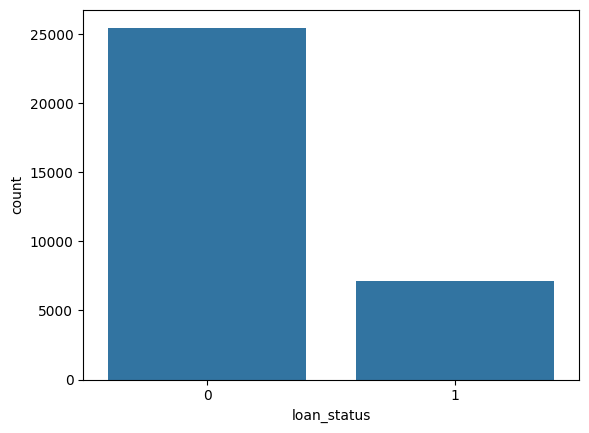

In [6]:
# Distribution of target variable
sns.countplot(x="loan_status", data=df)
plt.show()

<Axes: >

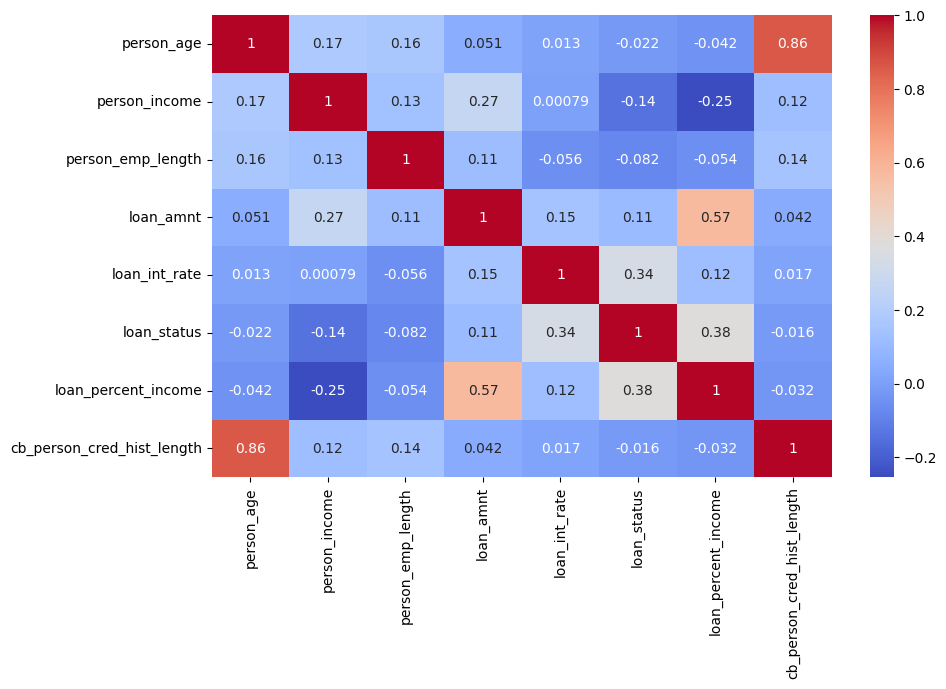

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")

Data Preprocessing

* Handling Missing Values

In [8]:
# Step 1: Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 2: Handle missing values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

* Encoding Categorical Data

In [9]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

* Separate Features and Target

In [10]:
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']               # Target

* Split the Dataset (Train & Test)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # keeps class balance
)

* Numerical Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#Saving the scalar (optional)
import joblib
joblib.dump(scaler, '/Users/nyasavishwas/AI-Based Credit Risk Assessment/models/scaler.pkl')

['/Users/nyasavishwas/AI-Based Credit Risk Assessment/models/scaler.pkl']

Train Supervised Learning Models

* Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

* XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Model Evaluation

* Evaluate Random Forest

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [21]:
y_pred_rf = model.predict(X_test_scaled)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_rf))

🎯 Random Forest Accuracy: 0.9337118305969004

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



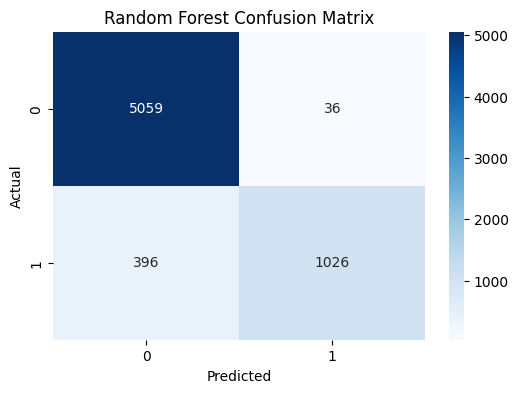

In [22]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Evaluate XGBoost

In [23]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_xgb))


🎯 XGBoost Accuracy: 0.9344790547798066

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.95      0.73      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



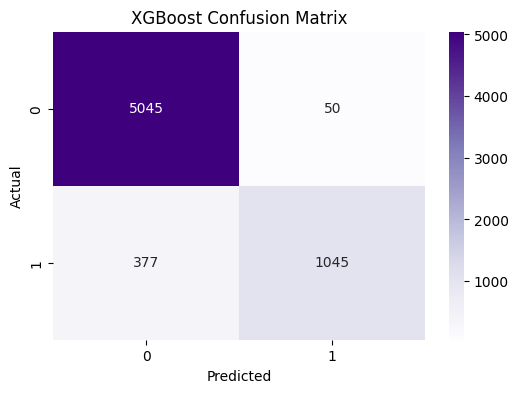

In [24]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Feature Importance

* Random Forest Feature Importance

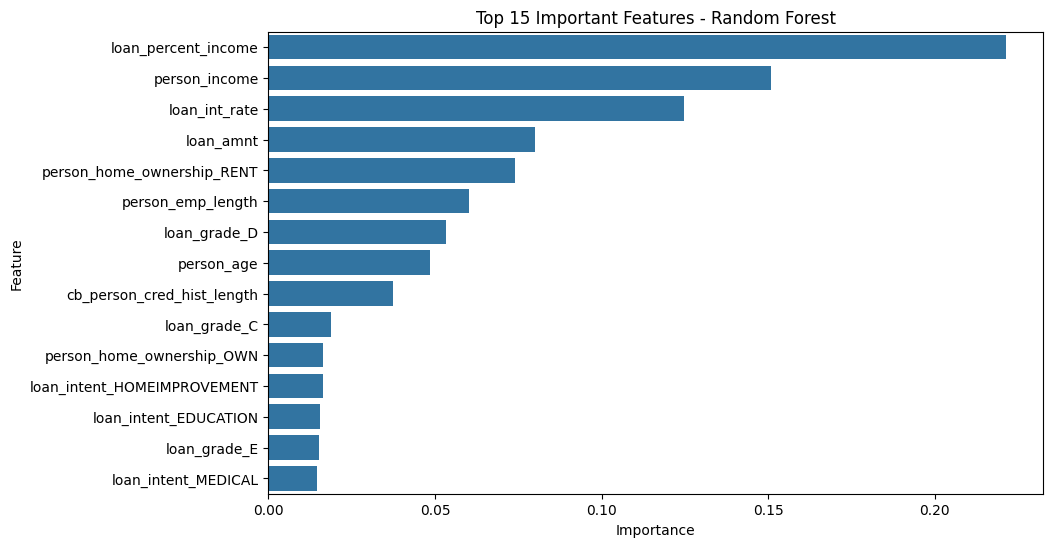

In [25]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features - Random Forest')
plt.show()

* XGBoost Feature Importance

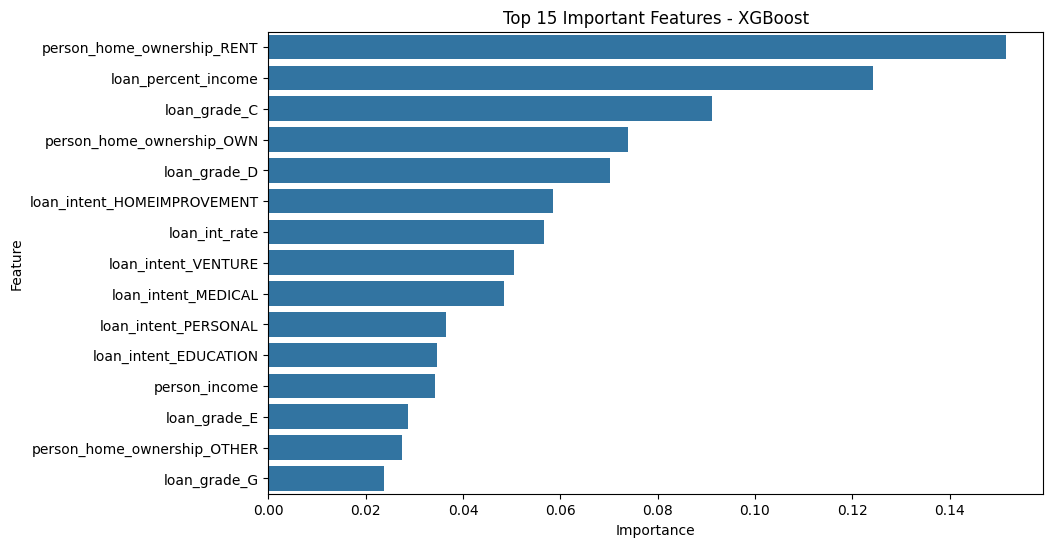

In [26]:
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15))
plt.title('Top 15 Important Features - XGBoost')
plt.show()

Comaprison of the two models (Random Forest & XGBoost)

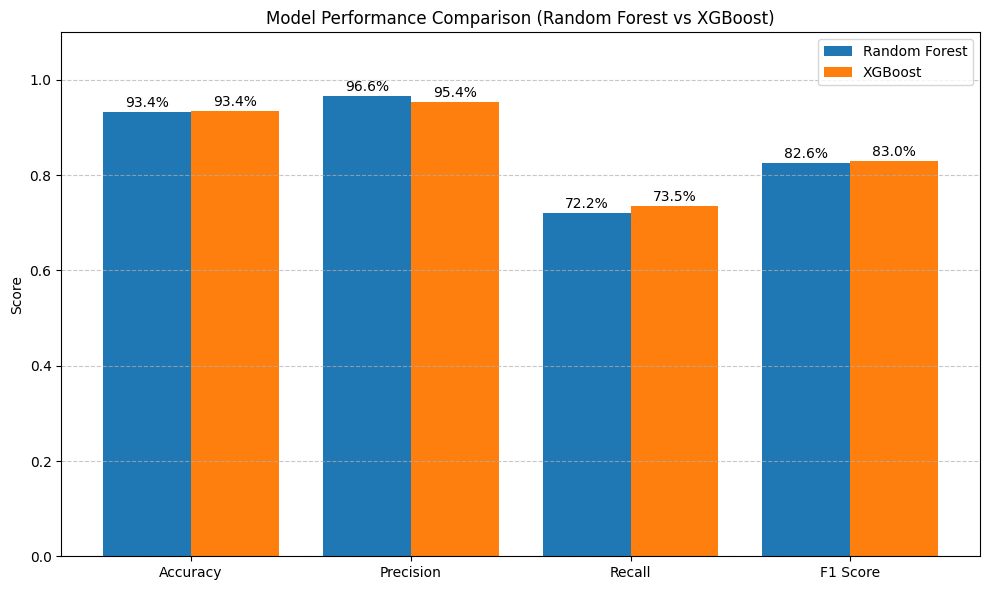

In [30]:
# Define metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

xgb_scores = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_xgb)
]

# Plotting
x = range(len(metrics))
bar_width = 0.4

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, rf_scores, width=bar_width, label='Random Forest', align='center')
bars2 = plt.bar([p + bar_width for p in x], xgb_scores, width=bar_width, label='XGBoost', align='center')

# Add labels on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', ha='center', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', ha='center', fontsize=10)

plt.xticks([p + bar_width / 2 for p in x], metrics)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Model Performance Comparison (Random Forest vs XGBoost)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Save Trained Models

In [28]:
joblib.dump(model, '/Users/nyasavishwas/AI-Based Credit Risk Assessment/models/random_forest.pkl')
joblib.dump(xgb_model, '/Users/nyasavishwas/AI-Based Credit Risk Assessment/models/xgboost.pkl')

['/Users/nyasavishwas/AI-Based Credit Risk Assessment/models/xgboost.pkl']